In [ ]:
% 
import sys; sys.path.insert(0, "..")
from multifunbrain import *
#
flag_path = False
if not flag_path:
    path_root = Path.cwd().parent
    path_data =  path_root / Path("data")
    #
    os.chdir(path_root)
    flag_path = True
print(os.getcwd())

/home/opisthofulax/Documents/UniPa/projects/multifun-brain


In [ ]:
ts = np.loadtxt(path_data / "HarvardOxford_48Parcels.ts.1D").T
zeros = np.where(np.sum(ts, axis=1) == 0)[0].astype(int)
ts2 = np.delete(ts, zeros, axis=0)  # Delete the element at index 2.
ts.shape, ts2.shape

(48, 488)

In [13]:
C = np.corrcoef(ts2)
eigvals, eigvecs = np.linalg.eig(C)

In [17]:
tsteps = ts2.shape[1]
gamma = ts2.shape[0]/tsteps
mp_dist = marchenko_pastur(eigvals, gamma)

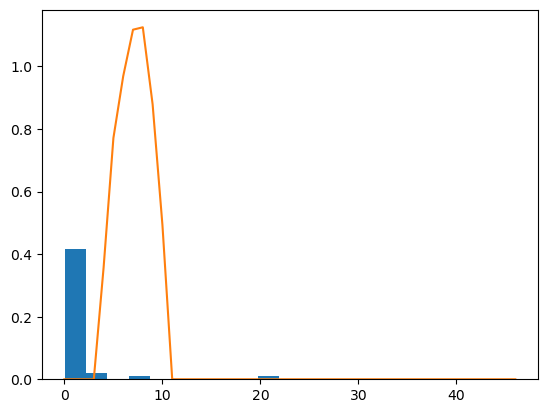

In [21]:
plt.hist(eigvals, density=True)
plt.plot(mp_dist, label="Marchenko-Pastur")

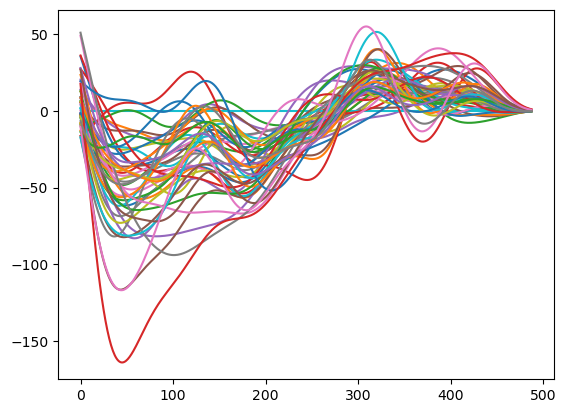

In [23]:
for i in range(len(ts)):
    signal = ts[i]-np.mean(ts[i])
    band4 = bandpass_filter(signal, low=0.001, high=0.01, fs=1)

    plt.plot(band4, label=f"Parcel {i+1}")

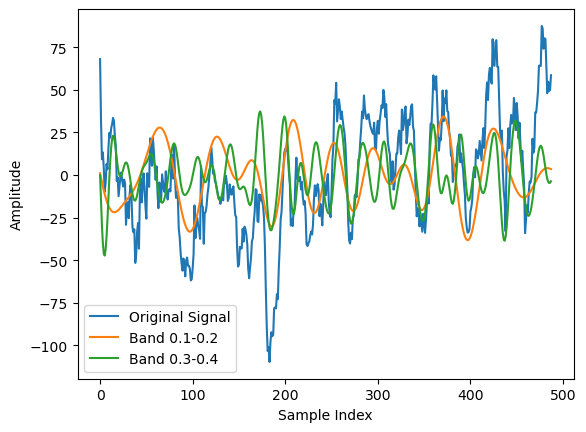

In [52]:
signal = ts[0]
fs = 0.98  # Change if actual fs is known.
band1 = bandpass_filter(signal, low=0.01, high=0.027, fs=fs)
band2 = bandpass_filter(signal, low=0.027, high=0.073, fs=fs)
# band3 = bandpass_filter(signal, low=0.01, high=0.1, fs=fs)
# band4 = bandpass_filter(signal, low=0.001, high=0.01, fs=fs)
indices = np.arange(len(signal))
plt.plot(indices, signal-np.mean(signal), label='Original Signal')
plt.plot(indices, band1, label='Band 0.1-0.2')
plt.plot(indices, band2, label='Band 0.3-0.4')
# plt.plot(indices, band3, label='Band 0.01-0.1')
# plt.plot(indices, band4, label='Band 0.001-0.01')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

In [91]:
n = len(ts[1])
spectrum = np.fft.fft(ts[1])
freq = np.fft.fftfreq(n, d=fs)

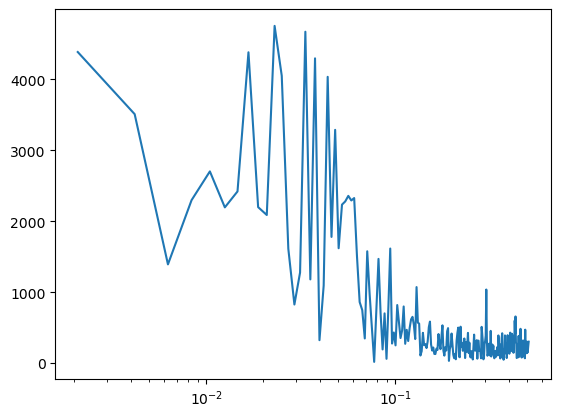

In [92]:
plt.plot(freq[mask][1:], np.abs(spectrum[mask][1:]))
# plt.yscale('log')
plt.xscale('log')

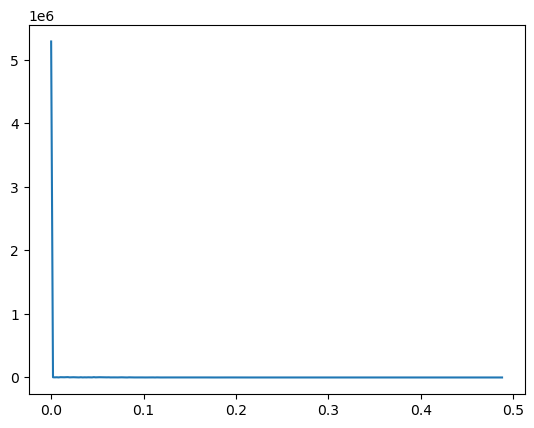

In [41]:
# Define sampling frequency if known; otherwise, fs=1 by default.
fs = 1/0.98
stect_tot = []
for tts in ts:
    n = len(tts)
    spectrum = np.fft.fft(tts)
    freq = np.fft.fftfreq(n, d=fs)
    stect_tot.append(np.abs(spectrum))
    # plt.plot(band4, label=f"Parcel {i+1}")
np.mean(stect_tot, axis=0)
# n = len(signal)
# spectrum = np.fft.fft(signal)
# freq = np.fft.fftfreq(n, d=1/fs)

# # Use only non-negative frequencies.
mask = freq >= 0
# plt.figure(figsize=(8, 4))
plt.plot(freq[mask], np.abs(spectrum[mask]))
# plt.xlabel('Frequency (Hz)')
# plt.ylabel('Magnitude')
# plt.title('Spectrum of Time Signal')
# # plt.yscale('log')
# # plt.xscale('log')
# plt.show()